<a href="https://colab.research.google.com/github/sujithcplusplus/facial_feature_mapping/blob/main/facial_featuremapping_with_transfer_learning_and_finetuning_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Facial Feature Mapping Project/Dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
coordinates = pd.read_csv('training.csv')
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
coordinates.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
coordinates.shape

(7049, 30)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

si_coordinates = pd.DataFrame(imputer.fit_transform(coordinates), columns=coordinates.columns)

In [ ]:
si_coordinates.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [ ]:
si_coordinates.shape

(7049, 30)

In [ ]:
si_coordinates.tail()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
7044,67.402546,31.842551,29.746749,38.632942,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.265961,67.029093,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,47.910346,66.626011,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,49.462572,67.515161,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,50.754202,66.724988,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.065186,79.586447
7048,66.938311,43.424510,31.096059,39.528604,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,47.069250,73.033339,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,45.900480,82.773096


In [ ]:
import tensorflow as tf
from PIL import Image
import glob
import os
paths = sorted(glob.glob('/content/images/train_images/*'))
paths[:10]

['/content/images/train_images/0.jpg',
 '/content/images/train_images/1.jpg',
 '/content/images/train_images/10.jpg',
 '/content/images/train_images/100.jpg',
 '/content/images/train_images/1000.jpg',
 '/content/images/train_images/1001.jpg',
 '/content/images/train_images/1002.jpg',
 '/content/images/train_images/1003.jpg',
 '/content/images/train_images/1004.jpg',
 '/content/images/train_images/1005.jpg']

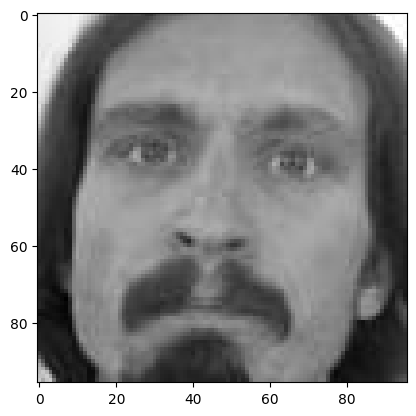

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.imshow(img.imread(paths[0]));

In [ ]:
from PIL import Image
import numpy as np
image_tensors = []
for i in paths:
  itensor = (tf.convert_to_tensor(Image.open(i),dtype=tf.float32))
  image_tensors.append(itensor)

image_tensors = np.array(image_tensors)

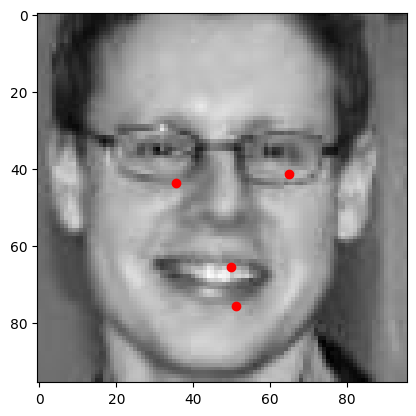

In [ ]:
import random
IMGNo = random.randint(0,len(paths)-1)
testImage = img.imread(paths[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot([coordinates.iloc[IMGNo,::2]],[coordinates.iloc[IMGNo,1::2]],'ro');

In [ ]:
y = []
for i in range(0,len(si_coordinates)):
  y_i = si_coordinates.iloc[i,:]
  y.append(y_i/96)

y = np.array(y,dtype='float')

In [ ]:
X = []
for i in range(0,len(image_tensors)):
  Xi = image_tensors[i]/255.
  X.append(Xi)
X = np.array(X,dtype='float')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# mobilenet_v2_layer = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
#                                                                     weights='imagenet',
#                                                                     input_shape=(96,96,3))
efficientnet_v2_layer = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top=False,
                                                                    weights='imagenet',
                                                                    input_shape=(96,96,3))
efficientnet_v2_layer.trainable = False

52606240/52606240 [==============================] - 0s 0us/step


In [ ]:
efficientnet_v2_model =  tf.keras.Sequential([
    tf.keras.Input(shape = (96,96,3),batch_size=32),
    efficientnet_v2_layer,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(30,activation='linear')
])

In [ ]:
efficientnet_v2_model.compile(loss = 'mae',
                           optimizer = 'adam',
                           metrics = ['mae','mse'])

In [ ]:
efficientnet_v2_history = efficientnet_v2_model.fit(X_train,y_train,
                       epochs = 25,
                       batch_size = 32,
                       validation_data = (X_val,y_val))

Epoch 1/25
177/177 [==============================] - 31s 51ms/step - loss: 0.0424 - mae: 0.0424 - mse: 0.0077 - val_loss: 0.0241 - val_mae: 0.0241 - val_mse: 0.0012
Epoch 2/25
177/177 [==============================] - 5s 29ms/step - loss: 0.0263 - mae: 0.0263 - mse: 0.0014 - val_loss: 0.0291 - val_mae: 0.0291 - val_mse: 0.0016
Epoch 3/25
177/177 [==============================] - 6s 33ms/step - loss: 0.0244 - mae: 0.0244 - mse: 0.0012 - val_loss: 0.0284 - val_mae: 0.0284 - val_mse: 0.0016
Epoch 4/25
177/177 [==============================] - 5s 29ms/step - loss: 0.0242 - mae: 0.0242 - mse: 0.0012 - val_loss: 0.0260 - val_mae: 0.0260 - val_mse: 0.0013
Epoch 5/25
177/177 [==============================] - 5s 30ms/step - loss: 0.0232 - mae: 0.0232 - mse: 0.0012 - val_loss: 0.0239 - val_mae: 0.0239 - val_mse: 0.0011
Epoch 6/25
177/177 [==============================] - 6s 32ms/step - loss: 0.0223 - mae: 0.0223 - mse: 0.0011 - val_loss: 0.0247 - val_mae: 0.0247 - val_mse: 0.0013
Epoch 7/2

In [ ]:
efficientnet_v2_model_val_predictions = efficientnet_v2_model.predict(X_val)

45/45 [==============================] - 3s 27ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
efficientnet_v2_model_mae = mean_absolute_error(y_val*96,efficientnet_v2_model_val_predictions*96)
efficientnet_v2_model_mse = mean_squared_error(y_val*96,efficientnet_v2_model_val_predictions*96)

efficientnet_v2_model_mae,efficientnet_v2_model_mse

(1.962764909909211, 9.57612816263556)

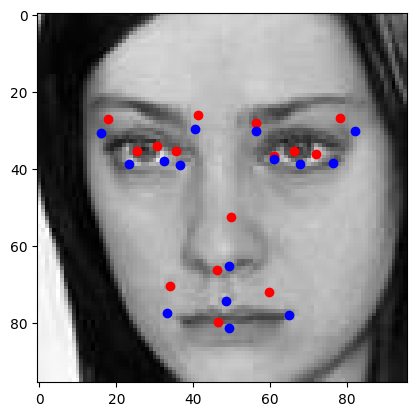

In [ ]:
y_val = pd.DataFrame(y_val)
efficientnet_v2_model_val_predictions = pd.DataFrame(efficientnet_v2_model_val_predictions)
IMGNo = random.randint(0,len(X_val)-1)
plt.imshow(X_val[IMGNo],cmap='gray')
plt.plot([y_val.iloc[IMGNo,::2]*96],[y_val.iloc[IMGNo,1::2]*96],'ro');
plt.plot([efficientnet_v2_model_val_predictions.iloc[IMGNo,::2]*96],[efficientnet_v2_model_val_predictions.iloc[IMGNo,1::2]*96],'bo');

In [ ]:
for layer_number,layer in enumerate(efficientnet_v2_layer.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
37 bl

In [ ]:
efficientnet_v2_layer.trainable = True

In [ ]:
for layer in efficientnet_v2_layer.layers[:-20]:
  layer.trainable = False

In [ ]:
for layer_number,layer in enumerate(efficientnet_v2_layer.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
37 bl

In [ ]:
efficientnet_v2_model.compile(loss = 'mae',
                           optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                           metrics = ['mae','mse'])

In [ ]:
efficientnet_v2_history = efficientnet_v2_model.fit(X_train,y_train,
                       epochs = 50,
                       batch_size = 32,
                       validation_data = (X_val,y_val),
                       initial_epoch = efficientnet_v2_history.epoch[-1])

Epoch 25/50
177/177 [==============================] - 24s 49ms/step - loss: 0.0720 - mae: 0.0720 - mse: 0.0506 - val_loss: 0.0294 - val_mae: 0.0294 - val_mse: 0.0016
Epoch 26/50
177/177 [==============================] - 7s 38ms/step - loss: 0.0241 - mae: 0.0241 - mse: 0.0013 - val_loss: 0.0218 - val_mae: 0.0218 - val_mse: 0.0011
Epoch 27/50
177/177 [==============================] - 6s 34ms/step - loss: 0.0207 - mae: 0.0207 - mse: 0.0011 - val_loss: 0.0289 - val_mae: 0.0289 - val_mse: 0.0015
Epoch 28/50
177/177 [==============================] - 6s 34ms/step - loss: 0.0202 - mae: 0.0202 - mse: 0.0010 - val_loss: 0.0260 - val_mae: 0.0260 - val_mse: 0.0013
Epoch 29/50
177/177 [==============================] - 7s 38ms/step - loss: 0.0184 - mae: 0.0184 - mse: 9.3127e-04 - val_loss: 0.0331 - val_mae: 0.0331 - val_mse: 0.0018
Epoch 30/50
177/177 [==============================] - 6s 34ms/step - loss: 0.0185 - mae: 0.0185 - mse: 9.3960e-04 - val_loss: 0.0263 - val_mae: 0.0263 - val_mse: 0.

In [ ]:
efficientnet_v2_model_mae = mean_absolute_error(y_val*96,efficientnet_v2_model_val_predictions*96)
efficientnet_v2_model_mse = mean_squared_error(y_val*96,efficientnet_v2_model_val_predictions*96)

efficientnet_v2_model_mae,efficientnet_v2_model_mse

(1.962764909909211, 9.57612816263556)

In [ ]:
efficientnet_v2_model_val_predictions = efficientnet_v2_model.predict(X_val)

45/45 [==============================] - 3s 23ms/step


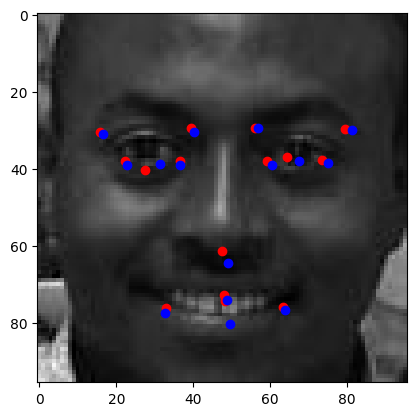

In [ ]:
y_val = pd.DataFrame(y_val)
efficientnet_v2_model_val_predictions = pd.DataFrame(efficientnet_v2_model_val_predictions)
IMGNo = random.randint(0,len(X_val)-1)
plt.imshow(X_val[IMGNo],cmap='gray')
plt.plot([y_val.iloc[IMGNo,::2]*96],[y_val.iloc[IMGNo,1::2]*96],'ro');
plt.plot([efficientnet_v2_model_val_predictions.iloc[IMGNo,::2]*96],[efficientnet_v2_model_val_predictions.iloc[IMGNo,1::2]*96],'bo');

In [ ]:
test_image_paths =sorted(glob.glob('/content/images/test_images/*'))


In [ ]:
test_images = []
for i in test_image_paths:
  tim = (tf.convert_to_tensor(Image.open(i),dtype = tf.float32))/255.
  test_images.append(tim)

test_images = np.array(test_images)

In [ ]:
efficientnet_v2_test_predictions = efficientnet_v2_model.predict(test_images)

56/56 [==============================] - 2s 32ms/step


In [ ]:
efficientnet_v2_test_predictions = pd.DataFrame(efficientnet_v2_test_predictions)*96

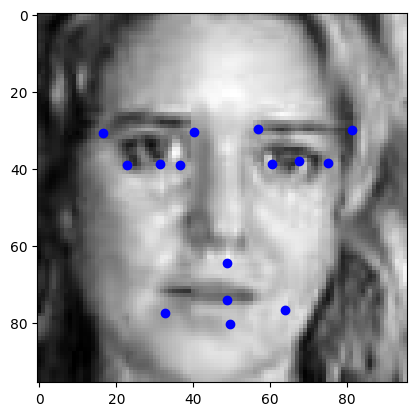

In [ ]:
IMGNo = random.randint(0,len(test_images)-1)
testImage = img.imread(test_image_paths[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot(efficientnet_v2_test_predictions.iloc[IMGNo,::2],efficientnet_v2_test_predictions.iloc[IMGNo,1::2],'bo');